In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab

from pylab import rcParams
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion

In [2]:
ds_FlatPrices = pd.read_csv('train.csv')

In [3]:
ds_FlatPrices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [4]:
ds_FlatPrices.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [5]:
ds_FlatPrices.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [6]:
feature_names = ds_FlatPrices.axes[1].values
numeric_features = np.delete(feature_names, [0, 1, 9, 10, 11, 13, 15, 18])

In [7]:
np.shape(ds_FlatPrices.loc[ds_FlatPrices['Ecology_2'] != ds_FlatPrices['Ecology_3']])

(372, 20)

Всего 372 измерения, где индексы экологии 2 и 3 не равны друг другу. Удалим один из них

In [8]:
ds_FlatPrices = ds_FlatPrices.drop(['Ecology_3'], axis=1)

Healthcare_1 имеет слишком мало измерений (50% от общей выборки) - так же не будем его учитывать

In [9]:
ds_FlatPrices = ds_FlatPrices.drop(['Healthcare_1'], axis=1)

In [10]:
ds_FlatPrices.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,33,7976,5,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,46,10309,1,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,34,7759,0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,23,5735,3,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,35,5776,1,2,4,B,150226.531644


#### работа со Square

In [11]:
ds_FlatPrices.loc[ds_FlatPrices['Square'] < 18, 'Square'] = 18

ds_FlatPrices.loc[ds_FlatPrices['Square'] < 10, 'Square'] = ds_FlatPrices.loc[
    ds_FlatPrices['Square'] < 10, 'Square'] * 10

ds_FlatPrices.loc[ds_FlatPrices['Square'] < ds_FlatPrices['LifeSquare'], 'Square'] = ds_FlatPrices.loc[
    ds_FlatPrices['Square'] < ds_FlatPrices['LifeSquare'], 'LifeSquare']

ds_FlatPrices.loc[ds_FlatPrices['Square'] > 1000, 'LifeSquare'] = ds_FlatPrices.loc[ds_FlatPrices['Square'] > 1000, 'LifeSquare'] / 100
ds_FlatPrices.loc[ds_FlatPrices['Square'] > 1000, 'Square'] = ds_FlatPrices.loc[ds_FlatPrices['Square'] > 1000, 'Square'] / 100

ds_FlatPrices.loc[ds_FlatPrices['Square'] > 300, 'LifeSquare'] = ds_FlatPrices.loc[ds_FlatPrices['Square'] > 300, 'LifeSquare'] / 10
ds_FlatPrices.loc[ds_FlatPrices['Square'] > 300, 'Square'] = ds_FlatPrices.loc[ds_FlatPrices['Square'] > 300, 'Square'] / 10

#### работа с KitchenSquare

In [12]:
ds_FlatPrices['KitchenSquare'].unique()[ds_FlatPrices['KitchenSquare'].unique().argsort()]

array([0.000e+00, 1.000e+00, 2.000e+00, 3.000e+00, 4.000e+00, 5.000e+00,
       6.000e+00, 7.000e+00, 8.000e+00, 9.000e+00, 1.000e+01, 1.100e+01,
       1.200e+01, 1.300e+01, 1.400e+01, 1.500e+01, 1.600e+01, 1.700e+01,
       1.800e+01, 1.900e+01, 2.000e+01, 2.100e+01, 2.200e+01, 2.300e+01,
       2.500e+01, 2.600e+01, 2.700e+01, 2.900e+01, 3.000e+01, 3.100e+01,
       3.200e+01, 3.500e+01, 3.600e+01, 3.700e+01, 3.900e+01, 4.000e+01,
       4.100e+01, 4.200e+01, 4.300e+01, 4.800e+01, 5.100e+01, 5.300e+01,
       5.400e+01, 5.800e+01, 6.000e+01, 6.200e+01, 6.300e+01, 6.600e+01,
       7.200e+01, 7.300e+01, 7.500e+01, 7.800e+01, 8.400e+01, 9.600e+01,
       1.120e+02, 1.230e+02, 1.970e+03, 2.014e+03])

есть строки, где площадь кухни почти равна площади квартиры. Установим для таких данных значение площади кухни равное среднему значению в процентах площади кухни от общей площади по всей выборке. То же самое сделаем для данных с площадью кухни равной 0

In [13]:
Kitchen_percent = (
    ds_FlatPrices.loc[(ds_FlatPrices['KitchenSquare'] < 25) & (ds_FlatPrices['KitchenSquare'] > 0), 'KitchenSquare'] / 
    ds_FlatPrices.loc[(ds_FlatPrices['KitchenSquare'] < 25) & (ds_FlatPrices['KitchenSquare'] > 0), 'Square']).mean()

In [14]:
Kitchen_percent

0.11799135301810391

In [15]:
ds_FlatPrices.loc[(ds_FlatPrices['KitchenSquare'] > 25) & 
                  (ds_FlatPrices['KitchenSquare'] - ds_FlatPrices['Square'] < 5), 
                  'KitchenSquare']  = ds_FlatPrices.loc[(ds_FlatPrices['KitchenSquare'] > 25) & 
                                      (ds_FlatPrices['KitchenSquare'] - ds_FlatPrices['Square'] < 5), 
                                      'Square'] * Kitchen_percent

ds_FlatPrices.loc[(ds_FlatPrices['KitchenSquare'] == 0), 'KitchenSquare'] = ds_FlatPrices.loc[
    (ds_FlatPrices['KitchenSquare'] == 0), 'Square'] * Kitchen_percent

ds_FlatPrices.loc[(ds_FlatPrices['KitchenSquare'] > ds_FlatPrices['Square']), 'KitchenSquare'] = ds_FlatPrices.loc[
    (ds_FlatPrices['KitchenSquare'] > ds_FlatPrices['Square']), 'Square'] * Kitchen_percent

ds_FlatPrices.loc[(ds_FlatPrices['KitchenSquare'] > 100), 'KitchenSquare'] = ds_FlatPrices.loc[
    (ds_FlatPrices['KitchenSquare'] > 100), 'KitchenSquare'] / 100

ds_FlatPrices.loc[(ds_FlatPrices['KitchenSquare'] < 1), 'KitchenSquare'] = ds_FlatPrices.loc[
    (ds_FlatPrices['KitchenSquare'] < 1), 'KitchenSquare'] * 10

#### работа со LifeSquare

In [16]:
Lifesquare_percent = (ds_FlatPrices.loc[ds_FlatPrices['LifeSquare'] > 10, 'LifeSquare'] / ds_FlatPrices.loc[
    ds_FlatPrices['LifeSquare'] > 10, 'Square']).mean()
Lifesquare_percent

0.6602540790071264

In [17]:
ds_FlatPrices['LifeSquare'] = ds_FlatPrices['LifeSquare'].fillna(
    ds_FlatPrices['Square'] - ds_FlatPrices['KitchenSquare'])

ds_FlatPrices.loc[ds_FlatPrices['LifeSquare'] < 10, 'LifeSquare'] = ds_FlatPrices.loc[
    ds_FlatPrices['LifeSquare'] < 10, 'Square'] * Lifesquare_percent

#### работа со Rooms

In [18]:
ds_FlatPrices['Rooms'].unique()

array([ 2.,  3.,  1.,  4., 10.,  0.,  5., 19.,  6.])

In [19]:
ds_FlatPrices.loc[ds_FlatPrices['Rooms'] > 6]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,74,19083,2,5,15,B,317265.323792
1454,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,1,264,0,0,1,B,78364.616704
8849,14865,9,10.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,B,25,5648,1,2,4,B,172329.270863


In [20]:
ds_FlatPrices.loc[ds_FlatPrices['Rooms'] > 6, 'Rooms'] = ds_FlatPrices.loc[ds_FlatPrices['Rooms'] > 6, 
                                                                           'LifeSquare'] // 15

ds_FlatPrices.loc[(ds_FlatPrices['Rooms'] == 0) & (ds_FlatPrices['Square'] < 100), 'Rooms'] = ds_FlatPrices.loc[
    (ds_FlatPrices['Rooms'] == 0) & (ds_FlatPrices['Square'] < 100), 'LifeSquare'] // 15

ds_FlatPrices.loc[ds_FlatPrices['Rooms'] == 0, 'Rooms'] = ds_FlatPrices['Rooms'].max()

In [21]:
indexes = ds_FlatPrices.loc[ds_FlatPrices['Floor'] > ds_FlatPrices['HouseFloor']].index

(ds_FlatPrices.loc[indexes, 'HouseFloor'], ds_FlatPrices.loc[indexes, 'Floor']) = (ds_FlatPrices.loc[indexes, 'Floor'], ds_FlatPrices.loc[indexes, 'HouseFloor'])

ds_FlatPrices.loc[ds_FlatPrices['HouseFloor'] > 50, 'HouseFloor'] = 10

In [22]:
ds_FlatPrices['HouseYear'].unique()[ds_FlatPrices['HouseYear'].unique().argsort()]

array([    1910,     1912,     1914,     1916,     1917,     1918,
           1919,     1928,     1929,     1930,     1931,     1932,
           1933,     1934,     1935,     1936,     1937,     1938,
           1939,     1940,     1941,     1942,     1947,     1948,
           1950,     1951,     1952,     1953,     1954,     1955,
           1956,     1957,     1958,     1959,     1960,     1961,
           1962,     1963,     1964,     1965,     1966,     1967,
           1968,     1969,     1970,     1971,     1972,     1973,
           1974,     1975,     1976,     1977,     1978,     1979,
           1980,     1981,     1982,     1983,     1984,     1985,
           1986,     1987,     1988,     1989,     1990,     1991,
           1992,     1993,     1994,     1995,     1996,     1997,
           1998,     1999,     2000,     2001,     2002,     2003,
           2004,     2005,     2006,     2007,     2008,     2009,
           2010,     2011,     2012,     2013,     2014,     2

In [23]:
ds_FlatPrices.loc[ds_FlatPrices['HouseYear'] == 4968, 'HouseYear'] = 1968
ds_FlatPrices.loc[ds_FlatPrices['HouseYear'] == 20052011, 'HouseYear'] = 2008

#### Введем дополнительные признаки

In [24]:
data_stat1 = ds_FlatPrices.groupby(
    ['Helthcare_2', 'Rooms'], as_index=False)[['Price']].mean().rename(columns={'Price':'mean_price_by_Healthcare'}
                                                                      )
ds_FlatPrices = pd.merge(ds_FlatPrices, data_stat1, on=['Helthcare_2', 'Rooms'], how='left')
ds_FlatPrices = ds_FlatPrices.rename(columns={'mean_price_by_Healthcare':'mean_price_by_Healthcare'})

data_stat2 = ds_FlatPrices.groupby(
    ['DistrictId', 'Rooms'],as_index=False)[['Price']].mean().rename(columns={'Price':'mean_price_in_District'}
                                                                    )
ds_FlatPrices = pd.merge(ds_FlatPrices, data_stat2, on=['DistrictId', 'Rooms'], how='left')
ds_FlatPrices = ds_FlatPrices.rename(columns={'mean_price_in_District':'mean_price_in_District'})

data_stat3 = ds_FlatPrices.groupby(['HouseYear', 'Rooms'], as_index=False)[['Price']].mean().rename(
        columns={'Price':'mean_price_by_HouseYear'}
                                                                      )
ds_FlatPrices = pd.merge(ds_FlatPrices, data_stat3, on=['HouseYear', 'Rooms'], how='left')

data_stat4 = ds_FlatPrices.groupby(
    ['Social_1', 'Rooms'], as_index=False)[['Price']].mean().rename(columns={'Price':'mean_price_by_Social_1'}
                                                                      )
ds_FlatPrices = pd.merge(ds_FlatPrices, data_stat4, on=['Social_1', 'Rooms'], how='left')

data_stat5 = ds_FlatPrices.groupby(
    ['Shops_1', 'Rooms'], as_index=False)[['Price']].mean().rename(columns={'Price':'mean_price_by_Shops_1'}
                                                                      )
ds_FlatPrices = pd.merge(ds_FlatPrices, data_stat5, on=['Shops_1', 'Rooms'], how='left')

data_stat6 = ds_FlatPrices.groupby(
    ['Social_3', 'Rooms'], as_index=False)[['Price']].mean().rename(
    columns={'Price':'mean_price_by_Social_3'}
                                                                      )
ds_FlatPrices = pd.merge(ds_FlatPrices, data_stat6, on=['Social_3', 'Rooms'], how='left')

ds_FlatPrices['Rounded_KitchenSquare'] = np.around(ds_FlatPrices['KitchenSquare'], decimals=1)
data_stat7 = ds_FlatPrices.groupby(
    ['Rounded_KitchenSquare', 'Rooms'], as_index=False)[['Price']].mean().rename(columns={
    'Price':'mean_price_by_rounded_KitchenSquare'}
                                                                 )

ds_FlatPrices = pd.merge(ds_FlatPrices, data_stat7, on=['Rounded_KitchenSquare', 'Rooms'], how='left')

data_stat8 = ds_FlatPrices.groupby(
    ['HouseFloor', 'Rooms'], as_index=False)[['Price']].mean().rename(
    columns={'Price':'mean_price_by_HouseFloor'}
                                                                      )
ds_FlatPrices = pd.merge(ds_FlatPrices, data_stat8, on=['HouseFloor', 'Rooms'], how='left')

data_stat9 = ds_FlatPrices.groupby(
    ['Floor', 'Rooms'], as_index=False)[['Price']].mean().rename(columns={'Price':'mean_price_by_Floor'}
                                                                      )
ds_FlatPrices = pd.merge(ds_FlatPrices, data_stat9, on=['Floor', 'Rooms'], how='left')

ds_FlatPrices['Rounded_Square'] = np.around(ds_FlatPrices['Square'], decimals=-1)

data_stat10 = ds_FlatPrices.groupby(
    ['Rounded_Square', 'Rooms'], as_index=False)[['Price']].mean().rename(
    columns={'Price':'mean_price_by_Rounded_Square'}
                                                                      )
ds_FlatPrices = pd.merge(ds_FlatPrices, data_stat10, on=['Rounded_Square', 'Rooms'], how='left')

### Посмотрим на распределение величин

Будем строить q-q график, характеризующий распределение признака. Признаки, которые возможно, приведем к нормальному распределению
Инфу взял из этой статьи
https://habr.com/ru/company/ods/blog/325422/

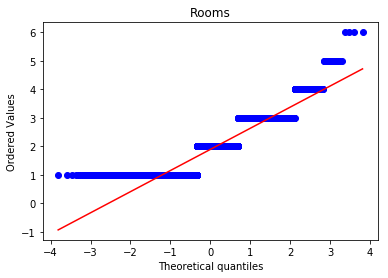

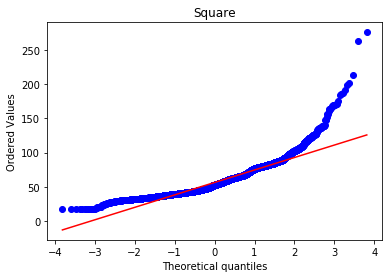

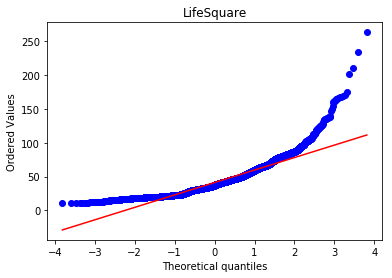

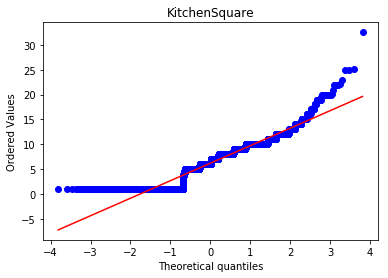

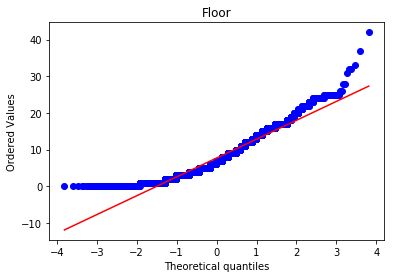

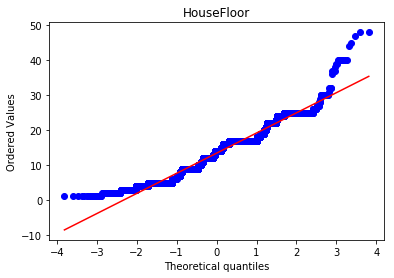

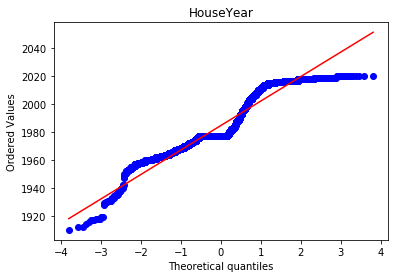

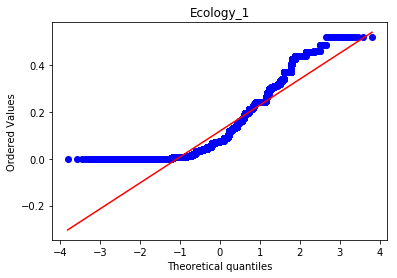

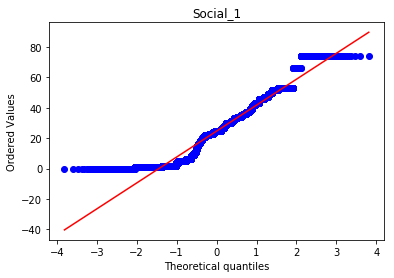

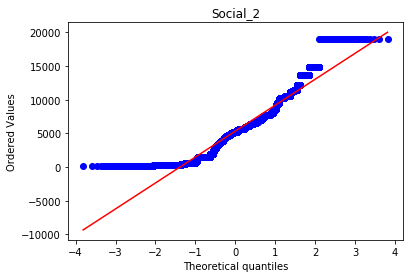

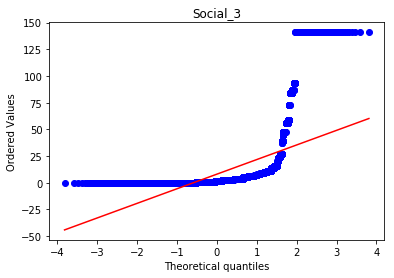

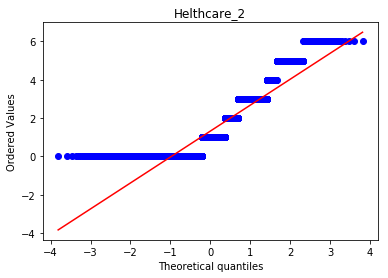

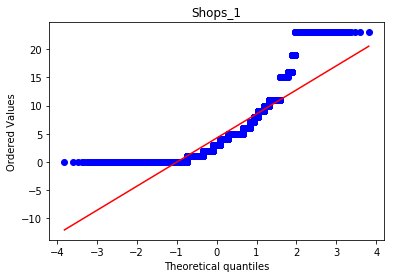

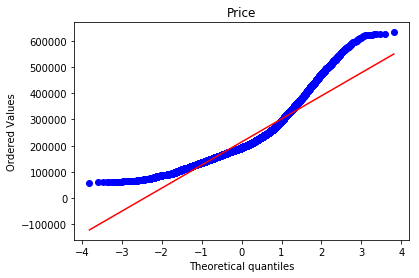

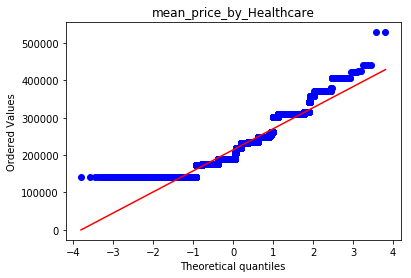

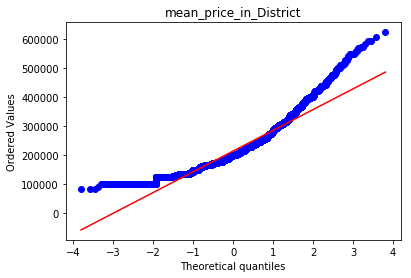

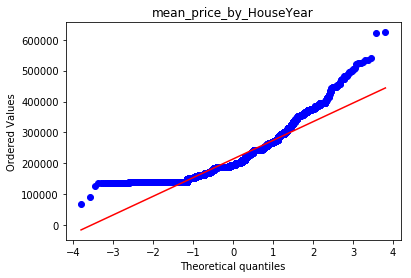

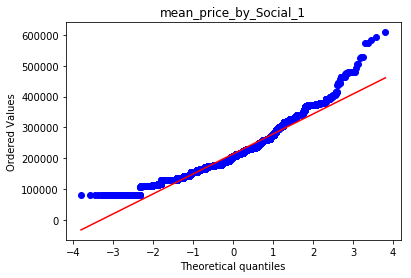

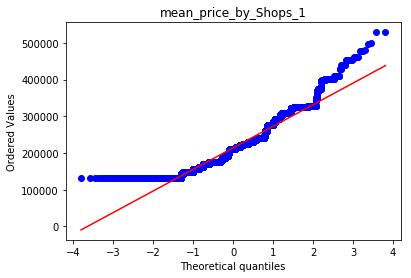

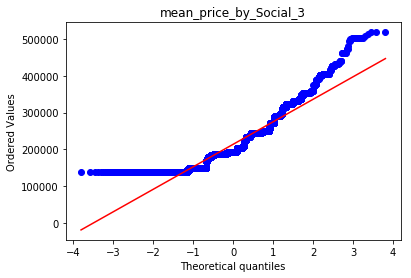

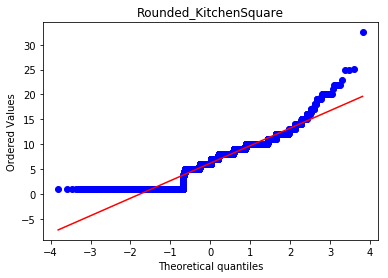

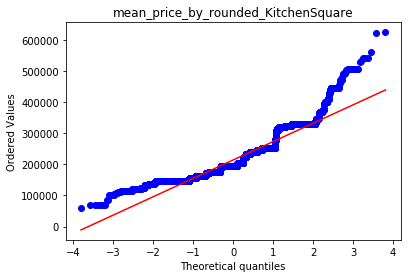

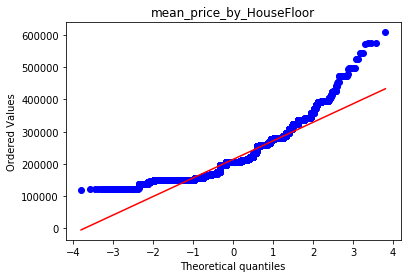

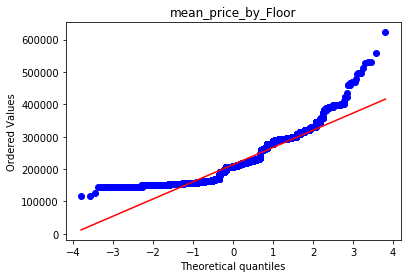

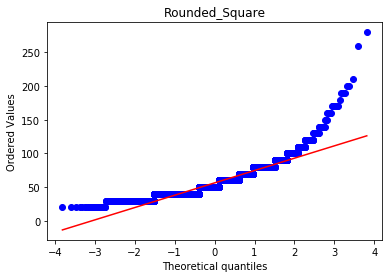

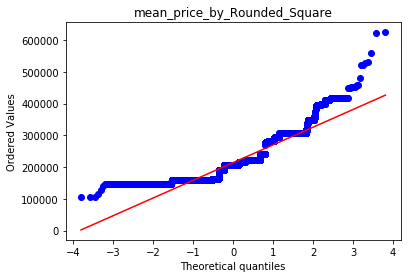

In [25]:
numeric_features = ds_FlatPrices.drop(['Id', 'DistrictId', 'Ecology_2', 'Shops_2'], axis=1).axes[1].values

for item in numeric_features:
    stats.probplot(ds_FlatPrices[item], dist="norm", plot=pylab)
    pylab.title(str(item))
    pylab.show()

In [26]:
ds_FlatPrices['Square'] = np.log(ds_FlatPrices['Square'])
ds_FlatPrices['LifeSquare'] = np.log(ds_FlatPrices['LifeSquare'])

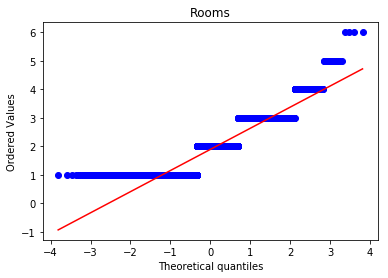

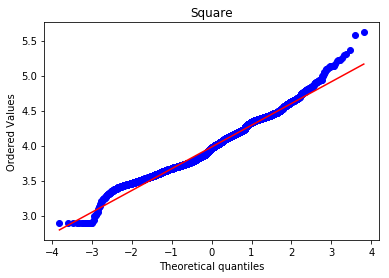

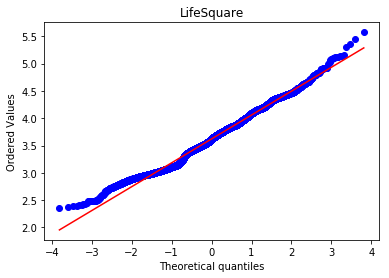

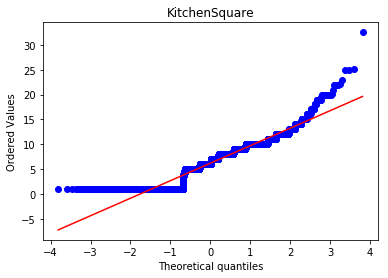

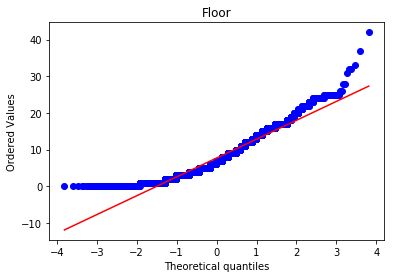

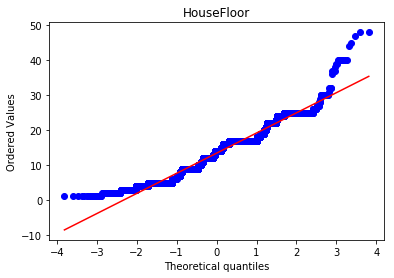

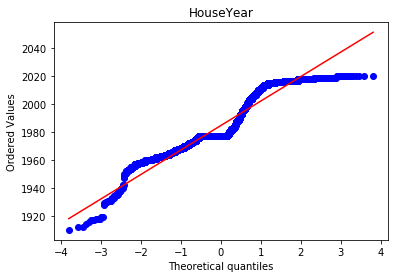

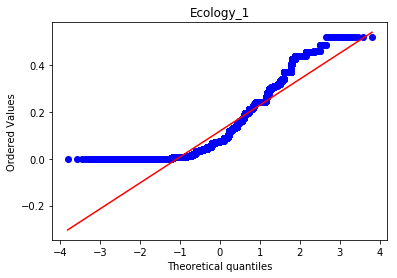

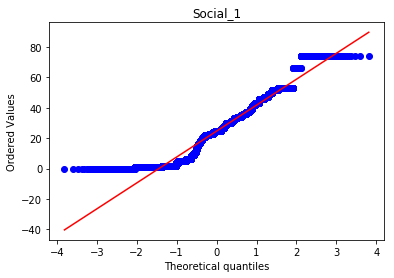

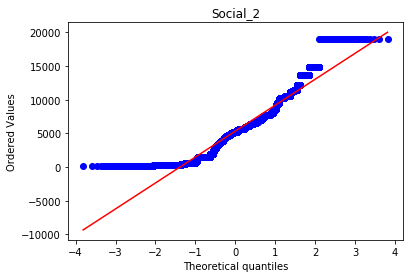

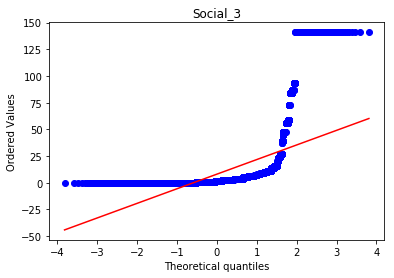

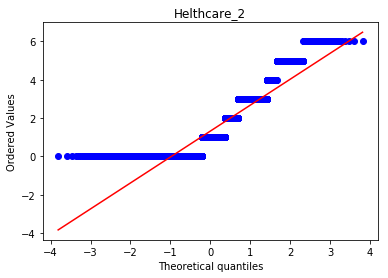

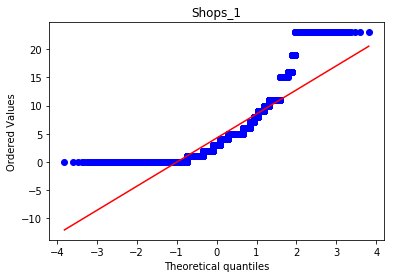

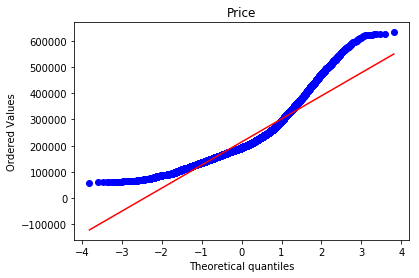

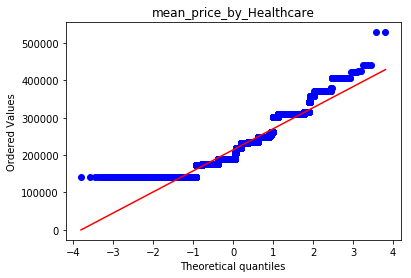

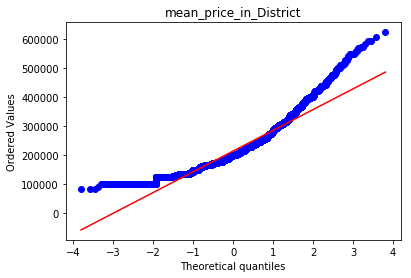

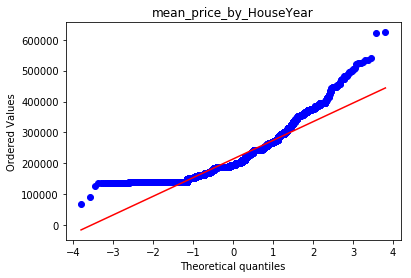

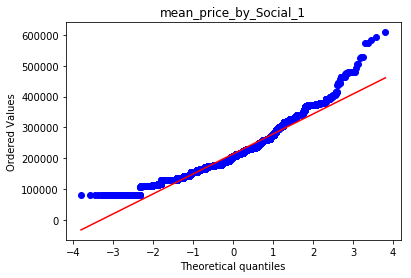

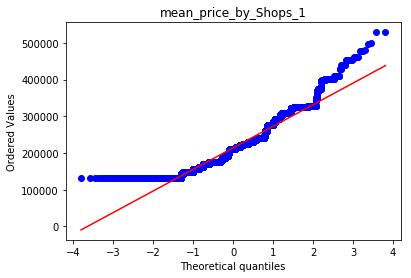

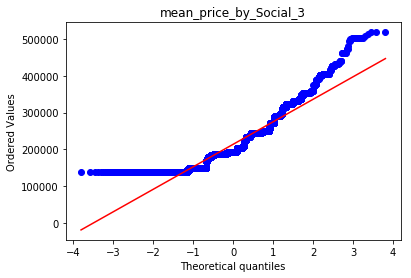

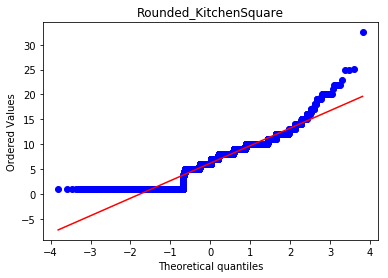

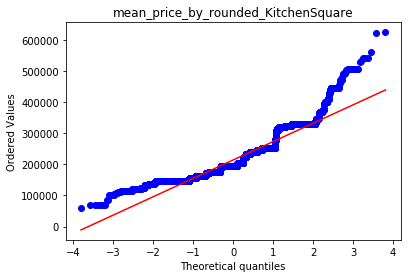

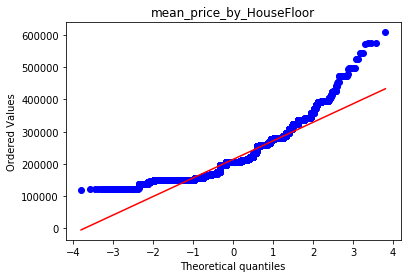

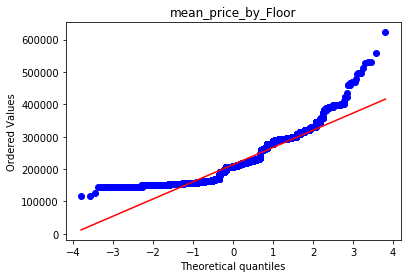

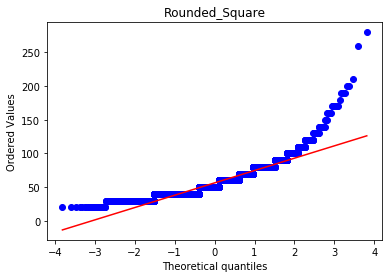

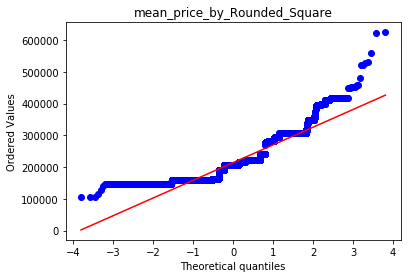

In [27]:
for item in numeric_features:
    stats.probplot(ds_FlatPrices[item], dist="norm", plot=pylab)
    pylab.title(str(item))
    pylab.show()

In [28]:
ds_FlatPrices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 30 columns):
Id                                     10000 non-null int64
DistrictId                             10000 non-null int64
Rooms                                  10000 non-null float64
Square                                 10000 non-null float64
LifeSquare                             10000 non-null float64
KitchenSquare                          10000 non-null float64
Floor                                  10000 non-null float64
HouseFloor                             10000 non-null float64
HouseYear                              10000 non-null int64
Ecology_1                              10000 non-null float64
Ecology_2                              10000 non-null object
Social_1                               10000 non-null int64
Social_2                               10000 non-null int64
Social_3                               10000 non-null int64
Helthcare_2                          

In [29]:
ds_FlatPrices = pd.get_dummies(ds_FlatPrices)

In [30]:
ds_FlatPrices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 32 columns):
Id                                     10000 non-null int64
DistrictId                             10000 non-null int64
Rooms                                  10000 non-null float64
Square                                 10000 non-null float64
LifeSquare                             10000 non-null float64
KitchenSquare                          10000 non-null float64
Floor                                  10000 non-null float64
HouseFloor                             10000 non-null float64
HouseYear                              10000 non-null int64
Ecology_1                              10000 non-null float64
Social_1                               10000 non-null int64
Social_2                               10000 non-null int64
Social_3                               10000 non-null int64
Helthcare_2                            10000 non-null int64
Shops_1                               

In [31]:
feature_names = ds_FlatPrices.axes[1].values
feature_names = np.delete(feature_names, 13)
feature_names

array(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare',
       'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1',
       'Social_1', 'Social_2', 'Social_3', 'Shops_1', 'Price',
       'mean_price_by_Healthcare', 'mean_price_in_District',
       'mean_price_by_HouseYear', 'mean_price_by_Social_1',
       'mean_price_by_Shops_1', 'mean_price_by_Social_3',
       'Rounded_KitchenSquare', 'mean_price_by_rounded_KitchenSquare',
       'mean_price_by_HouseFloor', 'mean_price_by_Floor',
       'Rounded_Square', 'mean_price_by_Rounded_Square', 'Ecology_2_A',
       'Ecology_2_B', 'Shops_2_A', 'Shops_2_B'], dtype=object)

In [32]:
ds_FlatPrices.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Rounded_KitchenSquare,mean_price_by_rounded_KitchenSquare,mean_price_by_HouseFloor,mean_price_by_Floor,Rounded_Square,mean_price_by_Rounded_Square,Ecology_2_A,Ecology_2_B,Shops_2_A,Shops_2_B
0,14038,35,2.0,3.870817,3.382448,6.00000,7.0,9.0,1969,0.089040,...,6.0,203196.239626,204549.996070,224153.227228,50.0,206003.406578,0,1,0,1
1,15053,41,3.0,4.184850,3.690117,8.00000,7.0,9.0,1978,0.000070,...,8.0,318443.801758,260104.363600,297386.608019,70.0,281858.613250,0,1,0,1
2,4765,53,2.0,3.805505,3.374087,5.30347,8.0,12.0,1968,0.049637,...,5.3,220925.908524,211603.979811,221204.669229,40.0,192176.155290,0,1,0,1
3,5809,58,2.0,3.976930,3.965213,9.00000,8.0,17.0,1977,0.437885,...,9.0,246977.805405,206690.746561,221204.669229,50.0,206003.406578,0,1,0,1
4,10783,99,1.0,3.680071,3.168684,7.00000,11.0,12.0,1976,0.012339,...,7.0,171194.691981,166185.179438,157551.249040,40.0,158324.804580,0,1,0,1


### Обучение

In [33]:
scaler = MinMaxScaler()

In [34]:
X = ds_FlatPrices.drop(['Price', 'Rounded_KitchenSquare', 'Rounded_Square'], axis=1)
y = ds_FlatPrices['Price']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 29 columns):
Id                                     10000 non-null int64
DistrictId                             10000 non-null int64
Rooms                                  10000 non-null float64
Square                                 10000 non-null float64
LifeSquare                             10000 non-null float64
KitchenSquare                          10000 non-null float64
Floor                                  10000 non-null float64
HouseFloor                             10000 non-null float64
HouseYear                              10000 non-null int64
Ecology_1                              10000 non-null float64
Social_1                               10000 non-null int64
Social_2                               10000 non-null int64
Social_3                               10000 non-null int64
Helthcare_2                            10000 non-null int64
Shops_1                               

In [37]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [38]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

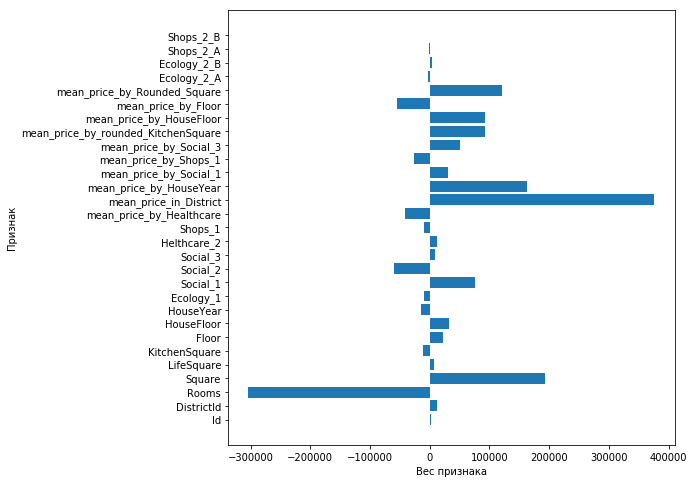

In [39]:
rcParams["figure.figsize"] = 8, 8
plt.barh(X.columns, lr.coef_.flatten())

plt.xlabel("Вес признака")
plt.ylabel("Признак")

plt.show()


In [40]:
important_features = [
    feature
    for feature, weight in zip(X.columns, lr.coef_.flatten())
    if np.abs(weight) > 1500
]
print(important_features)

['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2', 'Social_3', 'Helthcare_2', 'Shops_1', 'mean_price_by_Healthcare', 'mean_price_in_District', 'mean_price_by_HouseYear', 'mean_price_by_Social_1', 'mean_price_by_Shops_1', 'mean_price_by_Social_3', 'mean_price_by_rounded_KitchenSquare', 'mean_price_by_HouseFloor', 'mean_price_by_Floor', 'mean_price_by_Rounded_Square', 'Ecology_2_A', 'Ecology_2_B']


In [41]:
lr.fit(
    X_train_scaled.loc[:, important_features],
    y_train
)

y_pred = lr.predict(X_test_scaled.loc[:, important_features])

r2_score_1 = r2_score(y_test, y_pred)
r2_score_1

0.7408619551853849

In [42]:
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('regr', Lasso())
])

param_grid = [
    {
        'regr': [Lasso(), Ridge()],
        'regr__alpha': np.logspace(-4, 1, 6),
    },
    {
        'regr': [SGDRegressor()],
        'regr__alpha': np.logspace(-5, 0, 6),
        'regr__max_iter': [500, 1000],
    },
]

grid = GridSearchCV(pipe, param_grid=param_grid, cv=3, n_jobs=-1, scoring='r2')
grid.fit(X_train_scaled.loc[:, important_features], y_train)

predicted = grid.predict(X_test_scaled.loc[:, important_features])

print('Score:\t{}'.format(grid.score(X_test_scaled.loc[:, important_features], predicted)))

Score:	1.0


In [43]:
cv_results = pd.DataFrame(grid.cv_results_)
cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_regr', 'param_regr__alpha', 'param_regr__max_iter', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score'],
      dtype='object')

In [44]:
param_columns = [
    column
    for column in cv_results.columns
    if column.startswith('param_')
]

score_columns = ['mean_test_score', 'std_test_score']

cv_results = (cv_results[param_columns + score_columns]
              .sort_values(by=score_columns, ascending=False))

cv_results.head(10)

,param_regr,param_regr__alpha,param_regr__max_iter,mean_test_score,std_test_score
11,"Ridge(alpha=10.0, copy_X=True, fit_intercept=T...",10,NaN,0.746803,0.008982
5,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",10,NaN,0.746670,0.009079
10,"Ridge(alpha=10.0, copy_X=True, fit_intercept=T...",1,NaN,0.746652,0.009094
4,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",1,NaN,0.746634,0.009106
9,"Ridge(alpha=10.0, copy_X=True, fit_intercept=T...",0.1,NaN,0.746632,0.009107
3,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",0.1,NaN,0.746630,0.009109
8,"Ridge(alpha=10.0, copy_X=True, fit_intercept=T...",0.01,NaN,0.746630,0.009109
2,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",0.01,NaN,0.746630,0.009109
7,"Ridge(alpha=10.0, copy_X=True, fit_intercept=T...",0.001,NaN,0.746630,0.009109
1,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",0.001,NaN,0.746630,0.009109


In [45]:
grid.best_params_

{'regr': Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
       normalize=False, random_state=None, solver='auto', tol=0.001),
 'regr__alpha': 10.0}

In [46]:
r2_score(y_test, predicted)

0.7407530776521645

## Подготовка тестового датасета

In [47]:
ds_FlatPrices_test = pd.read_csv('test.csv')

In [48]:
ds_FlatPrices_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 742.3+ KB


In [49]:
ds_FlatPrices_test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [50]:
def prepare_test_dataset(ds_FlatPrices, Kitchen_percent, Lifesquare_percent, data_stat1, data_stat2, 
                         data_stat3, data_stat4, data_stat5, data_stat6, data_stat7, data_stat8, data_stat9, data_stat10):
    ds_FlatPrices = ds_FlatPrices.drop(['Ecology_3', 'Healthcare_1'], axis=1)

    ds_FlatPrices.loc[ds_FlatPrices['Square'] < 18, 'Square'] = 18

    ds_FlatPrices.loc[ds_FlatPrices['Square'] < 10, 'Square'] = ds_FlatPrices.loc[
        ds_FlatPrices['Square'] < 10, 'Square'] * 10

    ds_FlatPrices.loc[ds_FlatPrices['Square'] < ds_FlatPrices['LifeSquare'], 'Square'] = ds_FlatPrices.loc[
        ds_FlatPrices['Square'] < ds_FlatPrices['LifeSquare'], 'LifeSquare']

    ds_FlatPrices.loc[ds_FlatPrices['Square'] > 1000, 'LifeSquare'] = ds_FlatPrices.loc[
        ds_FlatPrices['Square'] > 1000, 'LifeSquare'] / 100
    ds_FlatPrices.loc[ds_FlatPrices['Square'] > 1000, 'Square'] = ds_FlatPrices.loc[
        ds_FlatPrices['Square'] > 1000, 'Square'] / 100

    ds_FlatPrices.loc[ds_FlatPrices['Square'] > 300, 'LifeSquare'] = ds_FlatPrices.loc[
        ds_FlatPrices['Square'] > 300, 'LifeSquare'] / 10
    ds_FlatPrices.loc[ds_FlatPrices['Square'] > 300, 'Square'] = ds_FlatPrices.loc[
        ds_FlatPrices['Square'] > 300, 'Square'] / 10
    
    ds_FlatPrices.loc[(ds_FlatPrices['KitchenSquare'] > 25) & 
                      (ds_FlatPrices['KitchenSquare'] - ds_FlatPrices['Square'] < 5), 
                      'KitchenSquare']  = ds_FlatPrices.loc[(ds_FlatPrices['KitchenSquare'] > 25) & 
                                                            (ds_FlatPrices['KitchenSquare'] - ds_FlatPrices['Square'] < 5), 
                                                            'Square'] * Kitchen_percent

    ds_FlatPrices.loc[(ds_FlatPrices['KitchenSquare'] == 0), 'KitchenSquare'] = ds_FlatPrices.loc[
        (ds_FlatPrices['KitchenSquare'] == 0), 'Square'] * Kitchen_percent

    ds_FlatPrices.loc[(ds_FlatPrices['KitchenSquare'] > ds_FlatPrices['Square']), 'KitchenSquare'] = ds_FlatPrices.loc[
        (ds_FlatPrices['KitchenSquare'] > ds_FlatPrices['Square']), 'Square'] * Kitchen_percent

    ds_FlatPrices.loc[(ds_FlatPrices['KitchenSquare'] > 100), 'KitchenSquare'] = ds_FlatPrices.loc[
        (ds_FlatPrices['KitchenSquare'] > 100), 'KitchenSquare'] / 100

    ds_FlatPrices.loc[(ds_FlatPrices['KitchenSquare'] < 1), 'KitchenSquare'] = ds_FlatPrices.loc[
        (ds_FlatPrices['KitchenSquare'] < 1), 'KitchenSquare'] * 10
    
    ds_FlatPrices['LifeSquare'] = ds_FlatPrices['LifeSquare'].fillna(
        ds_FlatPrices['Square'] - ds_FlatPrices['KitchenSquare'])
    
    ds_FlatPrices.loc[ds_FlatPrices['LifeSquare'] < 10, 'LifeSquare'] = ds_FlatPrices.loc[
        ds_FlatPrices['LifeSquare'] < 10, 'Square'] * Lifesquare_percent
    
    ds_FlatPrices.loc[ds_FlatPrices['Rooms'] > 6, 'Rooms'] = ds_FlatPrices.loc[ds_FlatPrices['Rooms'] > 6, 
                                                                               'LifeSquare'] // 15

    ds_FlatPrices.loc[(ds_FlatPrices['Rooms'] == 0) & (ds_FlatPrices['Square'] < 100), 'Rooms'] = ds_FlatPrices.loc[
        (ds_FlatPrices['Rooms'] == 0) & (ds_FlatPrices['Square'] < 100), 'LifeSquare'] // 15

    ds_FlatPrices.loc[ds_FlatPrices['Rooms'] == 0, 'Rooms'] = ds_FlatPrices['Rooms'].max()
    
    indexes = ds_FlatPrices.loc[ds_FlatPrices['Floor'] > ds_FlatPrices['HouseFloor']].index

    (ds_FlatPrices.loc[indexes, 'HouseFloor'], ds_FlatPrices.loc[indexes, 'Floor']) = (ds_FlatPrices.loc[
        indexes, 'Floor'], ds_FlatPrices.loc[indexes, 'HouseFloor'])

    ds_FlatPrices.loc[ds_FlatPrices['HouseFloor'] > 50, 'HouseFloor'] = 10
    
    ds_FlatPrices = pd.merge(ds_FlatPrices, data_stat1, on=['Helthcare_2', 'Rooms'], how='left')
    ds_FlatPrices = pd.merge(ds_FlatPrices, data_stat2, on=['DistrictId', 'Rooms'], how='left')
    ds_FlatPrices = pd.merge(ds_FlatPrices, data_stat3, on=['HouseYear', 'Rooms'], how='left')
    ds_FlatPrices = pd.merge(ds_FlatPrices, data_stat4, on=['Social_1', 'Rooms'], how='left')
    ds_FlatPrices = pd.merge(ds_FlatPrices, data_stat5, on=['Shops_1', 'Rooms'], how='left')
    ds_FlatPrices = pd.merge(ds_FlatPrices, data_stat6, on=['Social_3', 'Rooms'], how='left')
    ds_FlatPrices['Rounded_KitchenSquare'] = np.around(ds_FlatPrices['KitchenSquare'], decimals=1)
    ds_FlatPrices = pd.merge(ds_FlatPrices, data_stat7, on=['Rounded_KitchenSquare', 'Rooms'], how='left')
    ds_FlatPrices = pd.merge(ds_FlatPrices, data_stat8, on=['HouseFloor', 'Rooms'], how='left')
    ds_FlatPrices = pd.merge(ds_FlatPrices, data_stat9, on=['Floor', 'Rooms'], how='left')
    ds_FlatPrices['Rounded_Square'] = np.around(ds_FlatPrices['Square'], decimals=-1)
    ds_FlatPrices = pd.merge(ds_FlatPrices, data_stat10, on=['Rounded_Square', 'Rooms'], how='left')
    
    ds_FlatPrices['Square'] = np.log(ds_FlatPrices['Square'])
    ds_FlatPrices['LifeSquare'] = np.log(ds_FlatPrices['LifeSquare'])
    
    ds_FlatPrices = pd.get_dummies(ds_FlatPrices)
    
    ds_FlatPrices['mean_price_by_Floor'] = ds_FlatPrices['mean_price_by_Floor'].fillna(
        ds_FlatPrices['mean_price_by_Floor'].mean())
    ds_FlatPrices['mean_price_by_Healthcare'] = ds_FlatPrices['mean_price_by_Healthcare'].fillna(
        ds_FlatPrices['mean_price_by_Healthcare'].mean())
    ds_FlatPrices['mean_price_by_HouseFloor'] = ds_FlatPrices['mean_price_by_HouseFloor'].fillna(
        ds_FlatPrices['mean_price_by_HouseFloor'].mean())
    ds_FlatPrices['mean_price_by_HouseYear'] = ds_FlatPrices['mean_price_by_HouseYear'].fillna(
        ds_FlatPrices['mean_price_by_HouseYear'].mean())
    ds_FlatPrices['mean_price_by_rounded_KitchenSquare'] = ds_FlatPrices['mean_price_by_rounded_KitchenSquare'].fillna(
        ds_FlatPrices['mean_price_by_rounded_KitchenSquare'].mean())
    ds_FlatPrices['mean_price_by_Shops_1'] = ds_FlatPrices['mean_price_by_Shops_1'].fillna(
        ds_FlatPrices['mean_price_by_Shops_1'].mean())
    ds_FlatPrices['mean_price_by_Social_1'] = ds_FlatPrices['mean_price_by_Social_1'].fillna(
        ds_FlatPrices['mean_price_by_Social_1'].mean())
    ds_FlatPrices['mean_price_by_Social_3'] = ds_FlatPrices['mean_price_by_Social_3'].fillna(
        ds_FlatPrices['mean_price_by_Social_3'].mean())
    ds_FlatPrices['mean_price_in_District'] = ds_FlatPrices['mean_price_in_District'].fillna(
        ds_FlatPrices['mean_price_in_District'].mean())
    ds_FlatPrices['mean_price_by_Rounded_Square'] = ds_FlatPrices['mean_price_by_Rounded_Square'].fillna(
        ds_FlatPrices['mean_price_by_Rounded_Square'].mean())
    
    return ds_FlatPrices

In [51]:
ds_FlatPrices_test = prepare_test_dataset(ds_FlatPrices_test, Kitchen_percent, Lifesquare_percent, data_stat1, 
                                          data_stat2, data_stat3, data_stat4, data_stat5, data_stat6, 
                                          data_stat7, data_stat8, data_stat9, data_stat10)

In [52]:
ds_FlatPrices_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 31 columns):
Id                                     5000 non-null int64
DistrictId                             5000 non-null int64
Rooms                                  5000 non-null float64
Square                                 5000 non-null float64
LifeSquare                             5000 non-null float64
KitchenSquare                          5000 non-null float64
Floor                                  5000 non-null float64
HouseFloor                             5000 non-null float64
HouseYear                              5000 non-null int64
Ecology_1                              5000 non-null float64
Social_1                               5000 non-null int64
Social_2                               5000 non-null int64
Social_3                               5000 non-null int64
Helthcare_2                            5000 non-null int64
Shops_1                                5000 non-null 

In [53]:
X2= ds_FlatPrices_test.drop(['Rounded_KitchenSquare', 'Rounded_Square'], axis=1)

In [54]:
columns_ds = X2.columns

In [55]:
ds_FlatPrices_test_scaled = pd.DataFrame(scaler.transform(X2), columns=columns_ds)

In [56]:
ds_FlatPrices_test_scaled.loc[:,important_features]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,mean_price_by_HouseYear,mean_price_by_Social_1,mean_price_by_Shops_1,mean_price_by_Social_3,mean_price_by_rounded_KitchenSquare,mean_price_by_HouseFloor,mean_price_by_Floor,mean_price_by_Rounded_Square,Ecology_2_A,Ecology_2_B
0,0.043165,0.277512,0.2,0.421888,0.388965,0.208333,0.142857,0.276596,0.555556,0.594403,...,0.255901,0.189832,0.107409,0.144125,0.242674,0.228999,0.203848,0.193058,0.0,1.0
1,0.944034,0.354067,0.2,0.557746,0.631706,0.000000,0.023810,0.106383,0.601852,0.145207,...,0.215525,0.218469,0.210858,0.171277,0.227865,0.196323,0.178339,0.212125,0.0,1.0
2,0.326268,0.909091,0.0,0.000000,0.137263,0.458333,0.047619,0.085106,-0.027778,0.000000,...,0.260038,0.192196,0.096935,0.239615,0.238880,0.073485,0.074573,0.114396,0.0,1.0
3,0.932603,0.224880,0.2,0.579759,0.538782,0.333333,0.523810,0.446809,0.879630,0.195208,...,0.340423,0.362334,0.271006,0.171277,0.321366,0.298886,0.348554,0.212125,0.0,1.0
4,0.849905,0.129187,0.0,0.401866,0.477595,0.000000,0.404762,0.340426,0.972222,0.138268,...,0.150604,0.101453,0.000000,0.031162,0.138529,0.069485,0.068411,0.108904,0.0,1.0
5,0.454453,0.253589,0.0,0.337434,0.447182,0.000000,0.500000,0.425532,0.601852,0.095115,...,0.127278,0.165169,0.134131,0.000000,0.138529,0.215212,0.129724,0.101135,0.0,1.0
6,0.793582,0.110048,0.2,0.550733,0.614227,0.000000,0.047619,0.340426,0.601852,0.145207,...,0.215525,0.218469,0.210858,0.171277,0.227865,0.193930,0.158940,0.212125,0.0,1.0
7,0.327578,0.153110,0.2,0.407633,0.383065,0.208333,0.119048,0.276596,0.555556,0.259932,...,0.255901,0.349995,0.323387,0.352455,0.242674,0.228999,0.181713,0.193058,0.0,1.0
8,0.251250,0.459330,0.4,0.575375,0.497247,0.333333,0.404762,0.340426,0.787037,0.078787,...,0.453011,0.471772,0.401275,0.485897,0.457897,0.355683,0.392668,0.339304,0.0,1.0
9,0.686949,0.028708,0.4,0.618528,0.509535,0.333333,0.309524,0.340426,0.944444,0.466028,...,0.357284,0.264795,0.245237,0.280620,0.457897,0.355683,0.337795,0.388946,0.0,1.0


In [57]:
y_pred = grid.predict(ds_FlatPrices_test_scaled.loc[:, important_features])

In [58]:
ds_FlatPrices_test['Price'] = y_pred

In [59]:
ds_FlatPrices_test.loc[:,['Id','Price']].to_csv('YVlasov_predictions.csv',index=None)